In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("bank_marketing_part1_Data-1.csv")

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.shape

(210, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
df.describe(include='all')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [9]:
print("There are ", df.duplicated().sum(), " duplicate values in the dataset")

There are  0  duplicate values in the dataset


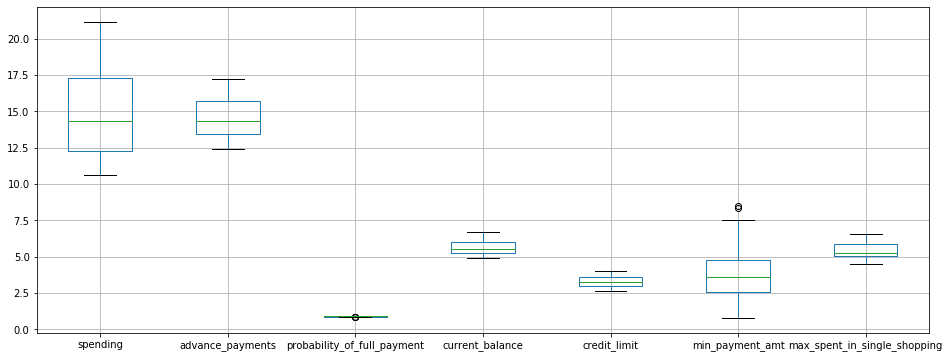

In [10]:
plt.figure(figsize=(16,6))
df.boxplot()

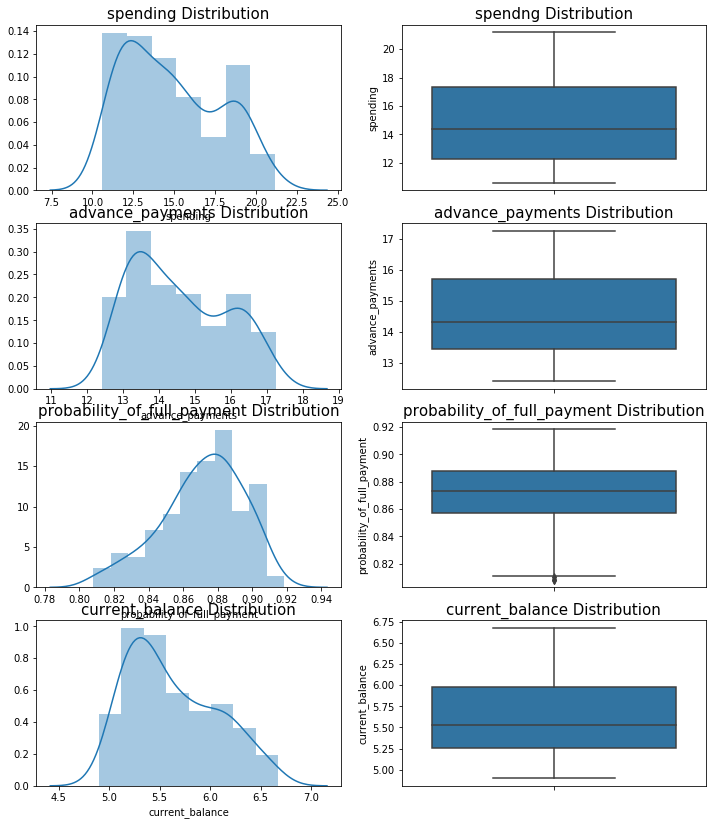

In [11]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(df['spending'] , ax=axes[0][0])
a.set_title("spending Distribution",fontsize=15)
a = sns.boxplot(df['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("spendng Distribution",fontsize=15)

a = sns.distplot(df['advance_payments'] , ax=axes[1][0])
a.set_title("advance_payments Distribution",fontsize=15)
a = sns.boxplot(df['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments Distribution",fontsize=15)

a = sns.distplot(df['probability_of_full_payment'] , ax=axes[2][0])
a.set_title("probability_of_full_payment Distribution",fontsize=15)
a = sns.boxplot(df['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("probability_of_full_payment Distribution",fontsize=15)

a = sns.distplot(df['current_balance'] , ax=axes[3][0])
a.set_title("current_balance Distribution",fontsize=15)
a = sns.boxplot(df['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("current_balance Distribution",fontsize=15)

plt.show()

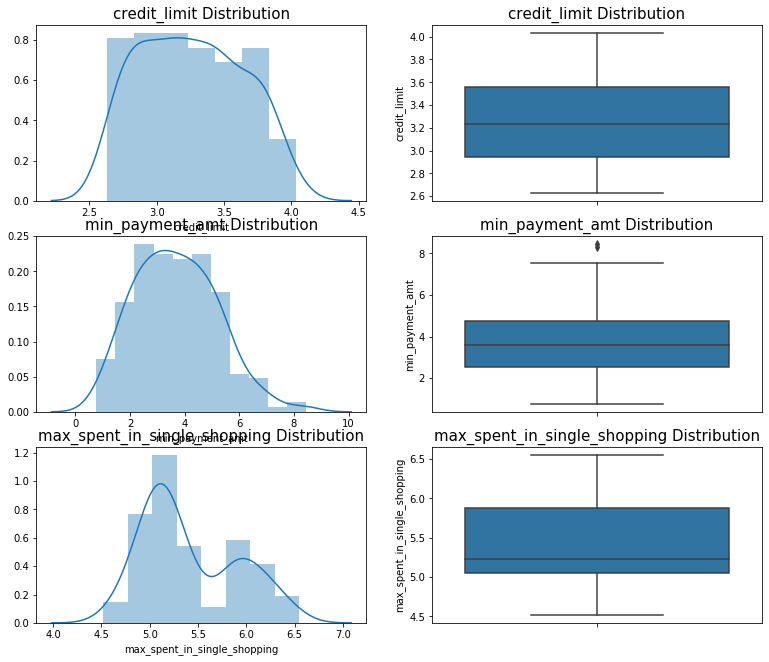

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(13, 11)
a = sns.distplot(df['credit_limit'] , ax=axes[0][0])
a.set_title("credit_limit Distribution",fontsize=15)
a = sns.boxplot(df['credit_limit'] , orient = "v" , ax=axes[0][1])
a.set_title("credit_limit Distribution",fontsize=15)

a = sns.distplot(df['min_payment_amt'] , ax=axes[1][0])
a.set_title("min_payment_amt Distribution",fontsize=15)
a = sns.boxplot(df['min_payment_amt'] , orient = "v" , ax=axes[1][1])
a.set_title("min_payment_amt Distribution",fontsize=15)

a = sns.distplot(df['max_spent_in_single_shopping'] , ax=axes[2][0])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)
a = sns.boxplot(df['max_spent_in_single_shopping'] , orient = "v" , ax=axes[2][1])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)

plt.show()

In [12]:
# Outlier treatment
#Since Hierachical clustering is sensitive to outliers, we are treating them

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
lpbf,upbf=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>upbf,upbf,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lpbf,lpbf,df['probability_of_full_payment'])

lmpa,umpa=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>umpa,umpa,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lmpa,lmpa,df['min_payment_amt'])

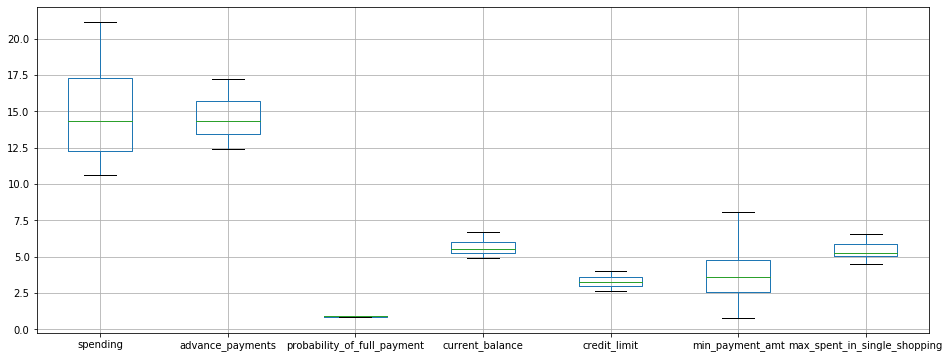

In [14]:
plt.figure(figsize=(16,6))
df.boxplot()

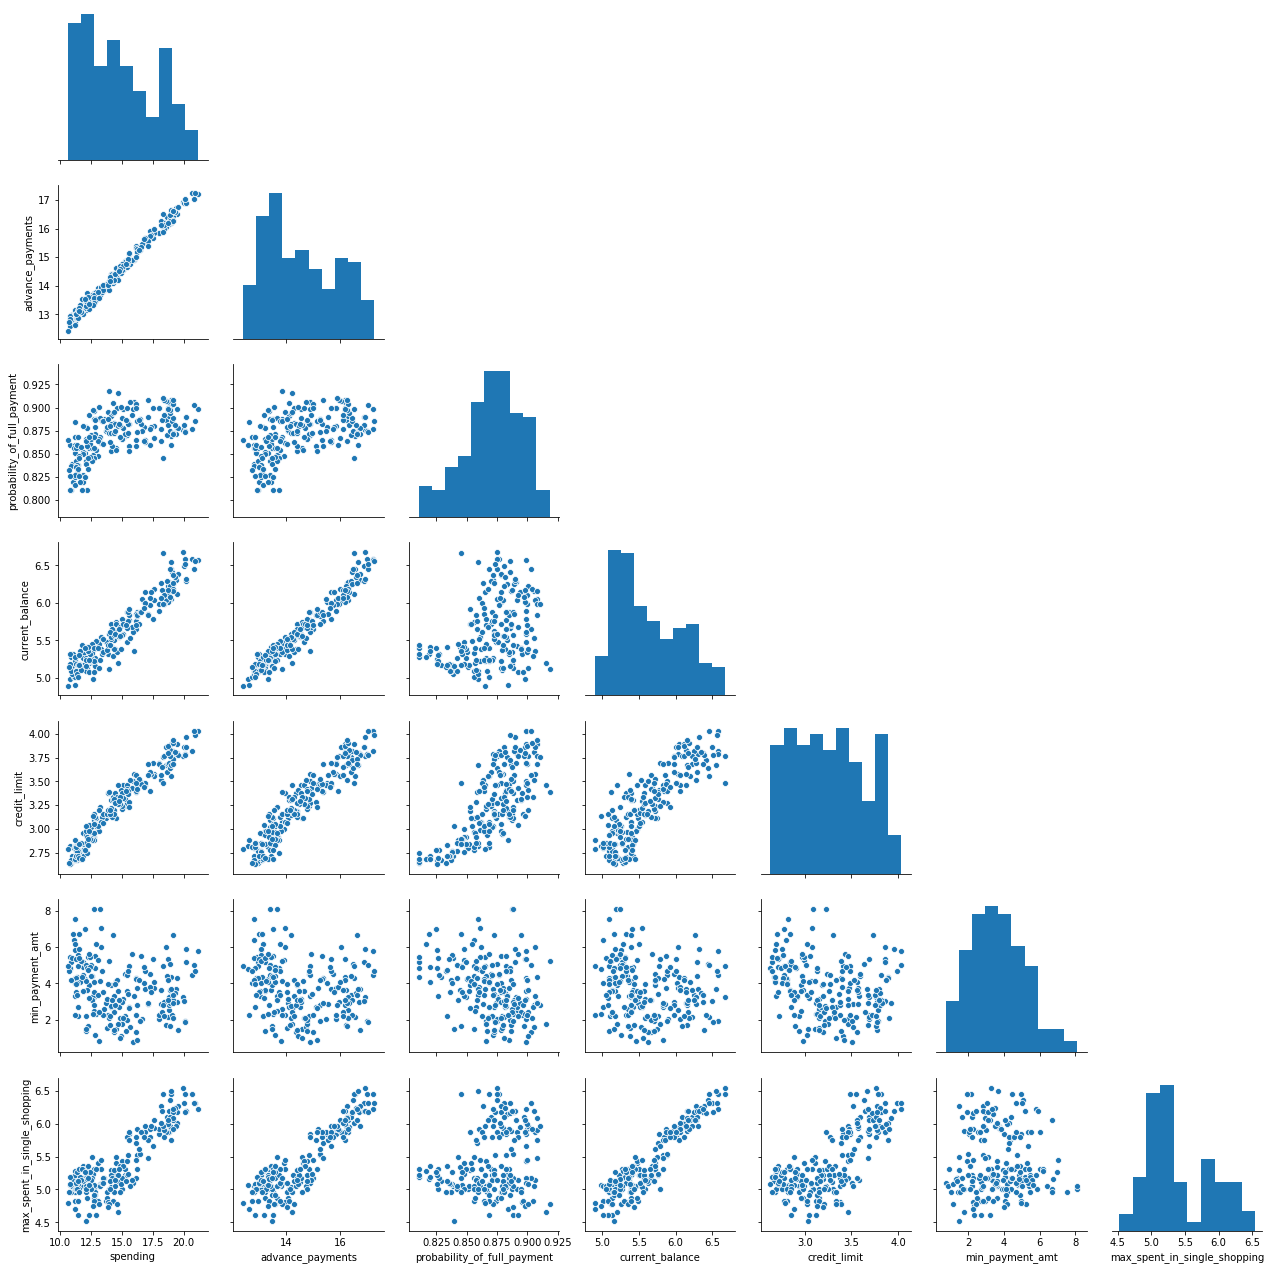

In [17]:
sns.pairplot(df,corner=True)

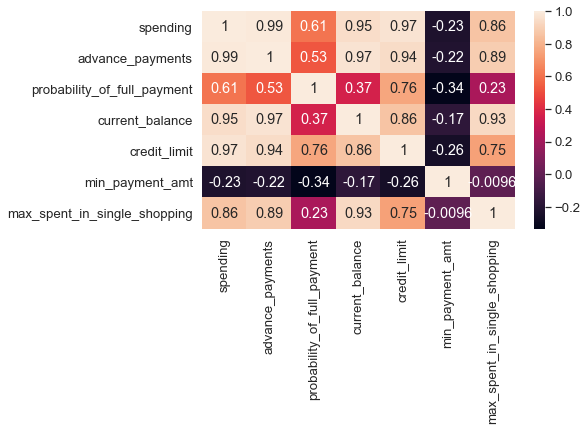

In [18]:
# construct heatmap with only continuous variables
plt.figure(figsize=(7,4))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),annot=True)

# Standardize the data.


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = StandardScaler()

In [19]:
scaled_DF = X.fit_transform(df)

In [20]:
scaled_DF = pd.DataFrame(scaled_DF, index=df.index, columns=df.columns)
scaled_DF.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


# Comparing various linkage methods

In [21]:
import scipy.cluster.hierarchy as sch
x = pd.DataFrame(scaled_DF)
x_subset1 = x.loc[100:120 ,:].values

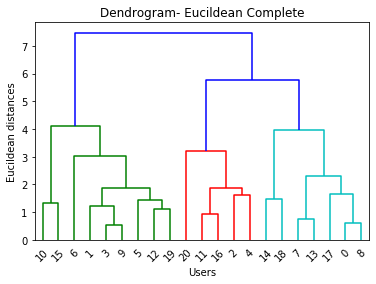

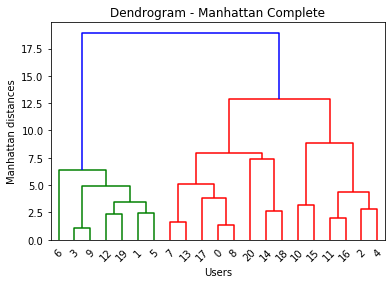

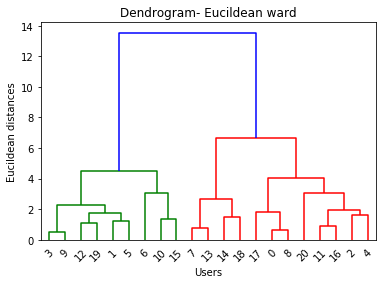

In [22]:
dendrogram = sch.dendrogram(sch.linkage(x_subset1, method = "complete", metric='euclidean'))
plt.title('Dendrogram- Eucildean Complete') 
plt.xlabel('Users') 
plt.ylabel('Eucildean distances')
plt.show()

dendrogram = sch.dendrogram(sch.linkage(x_subset1, method = "complete", metric='cityblock'))
plt.title('Dendrogram - Manhattan Complete') 
plt.xlabel('Users') 
plt.ylabel('Manhattan distances')
plt.show()

dendrogram = sch.dendrogram(sch.linkage(x_subset1, method = "ward", metric='euclidean'))
plt.title('Dendrogram- Eucildean ward') 
plt.xlabel('Users') 
plt.ylabel('Eucildean distances')
plt.show()

# # Perform Hierarchical Clustering with the Ward's linkage method and plot the dendrogram.
# We use 'ward' as the method since it minimizes the variants of distances between the clusters.

In [23]:
 from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
HClust = linkage(scaled_DF, method = 'ward')

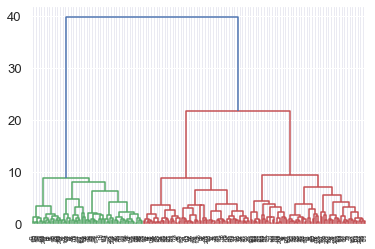

In [54]:
dend = dendrogram(HClust)

# Plot the truncated dendrogram with the last 25 clusters.

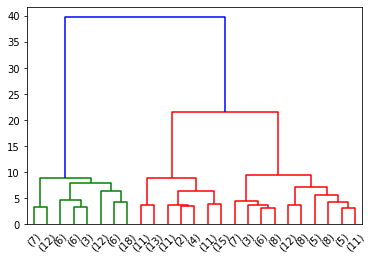

In [25]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

# Plot the truncated dendrogram with the last 15 clusters.

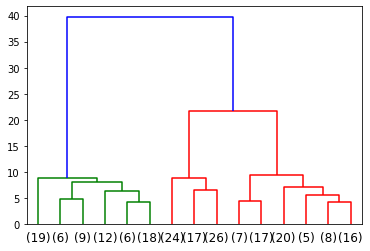

In [26]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 15,# we are looking at the last 15 merges
                 )

# Identify the optimal number of clusters based on the dendrogram and add the cluster numbers to the original dataframe.

In [27]:
from scipy.cluster.hierarchy import fcluster

In [31]:
#Method 1 for 2 clusters

clusters_2 = fcluster(HClust, 2, criterion='maxclust')
clusters_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [28]:
#Method 1 for 3 clusters

clusters_3 = fcluster(HClust, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [29]:
# Method 2 for 2 clusters

clusters_2_dist = fcluster(HClust, 25, criterion='distance')
clusters_2_dist

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [30]:
# Method 2 for 3 clusters

clusters_3_dist = fcluster(HClust, 15, criterion='distance')
clusters_3_dist

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [ ]:
# Subjective choice1 - with 2 clusters

In [31]:
X1 = scaled_DF.iloc[:].values

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Cluster2_No =cluster2.fit_predict(X1)
#print(Cluster_No)

In [33]:
df['H_clusters2'] = Cluster2_No

In [34]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters2
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


# Export the dataframe thus created with the clusters into a csv file.

In [73]:
df.to_csv('H_Cluster2bankmarket.csv')

# Cluster Profiles

In [76]:
aggdata=df.iloc[:].groupby('H_clusters2').mean()
aggdata['Freq']=df.H_clusters2.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
H_clusters2,,,,,,,,
0,13.085571,13.766214,0.864298,5.363714,3.045593,3.730723,5.103421,140
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70


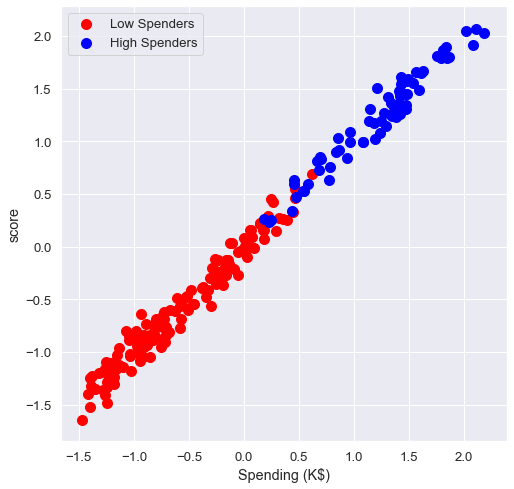

In [83]:
plt.figure(figsize=(8,8))
plt.scatter(X1[Cluster2_No == 0, 0], X1[Cluster2_No == 0, 1], s = 100, c = 'red', label = 'Low Spenders')
plt.scatter(X1[Cluster2_No == 1, 0], X1[Cluster2_No == 1, 1], s = 100, c = 'blue', label = 'High Spenders')
plt.xlabel('Spending (K$)')
plt.ylabel('score')
plt.legend()
plt.show()

In [ ]:
# Subjective choice1 - with 3 clusters

In [77]:
X2 = scaled_DF.iloc[:].values

In [78]:
from sklearn.cluster import AgglomerativeClustering
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster3_No = cluster3.fit_predict(X2)

In [79]:
df['H_clusters3'] = Cluster3_No

In [80]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters2,H_clusters3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,0,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,0,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,0,0
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0,2


In [81]:
df.to_csv('H_Cluster3bankmarket.csv')

In [82]:
aggdata=df.iloc[:].groupby('H_clusters3').mean()
aggdata['Freq']=df.H_clusters3.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters2,Freq
H_clusters3,,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,0,73
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,0,67


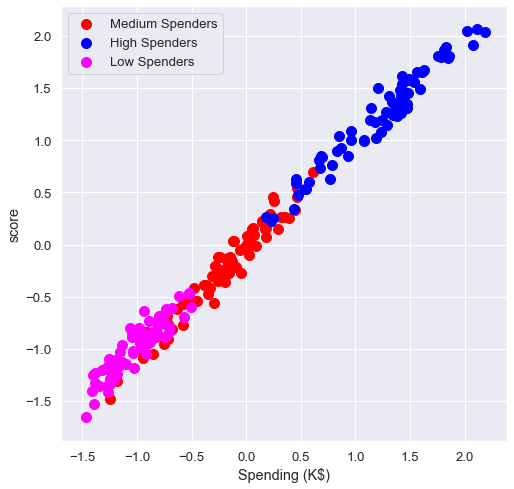

In [86]:
plt.figure(figsize=(8,8))
plt.scatter(X2[Cluster3_No == 0, 0], X2[Cluster3_No == 0, 1], s = 100, c = 'red', label = 'Medium Spenders')
plt.scatter(X2[Cluster3_No == 1, 0], X2[Cluster3_No == 1, 1], s = 100, c = 'blue', label = 'High Spenders')
plt.scatter(X2[Cluster3_No == 2, 0], X2[Cluster3_No == 2, 1], s = 100, c = 'Magenta', label = 'Low Spenders')
plt.xlabel('Spending (K$)')
plt.ylabel('score')
plt.legend()
plt.show()

# Perform the K-Means clustering with 2 clusters.

In [35]:
from sklearn.cluster import KMeans 

In [36]:
kmeans = KMeans(n_clusters = 2).fit(scaled_DF)
labels = kmeans.labels_

In [ ]:
#Elbow plot

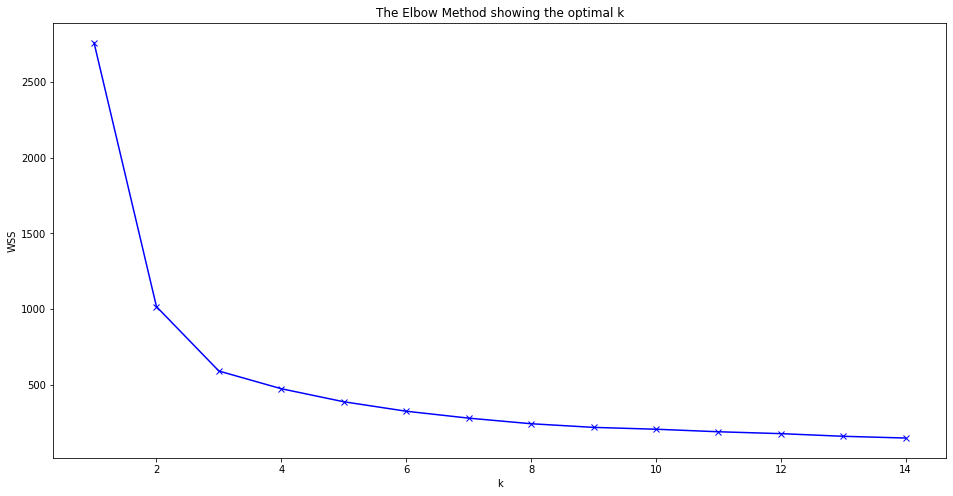

In [37]:
wss = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    wss.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Check silhouette score

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [94]:
ss={1:0} 
for i in range(2, 15):
    clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y=clusterer.fit_predict(scaled_DF)
    # The higher (up to 1) the better
    s =silhouette_score(scaled_DF, y )
    ss[i]=round(s,5)
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.46577
The Average Silhouette Score for 3 clusters is 0.40073
The Average Silhouette Score for 4 clusters is 0.3292
The Average Silhouette Score for 5 clusters is 0.2865
The Average Silhouette Score for 6 clusters is 0.29128
The Average Silhouette Score for 7 clusters is 0.27394
The Average Silhouette Score for 8 clusters is 0.25023
The Average Silhouette Score for 9 clusters is 0.24491
The Average Silhouette Score for 10 clusters is 0.25027
The Average Silhouette Score for 11 clusters is 0.25275
The Average Silhouette Score for 12 clusters is 0.24046
The Average Silhouette Score for 13 clusters is 0.24633
The Average Silhouette Score for 14 clusters is 0.24407


# silhouette plot

Text(0.5, 0, 'Number of clusters')

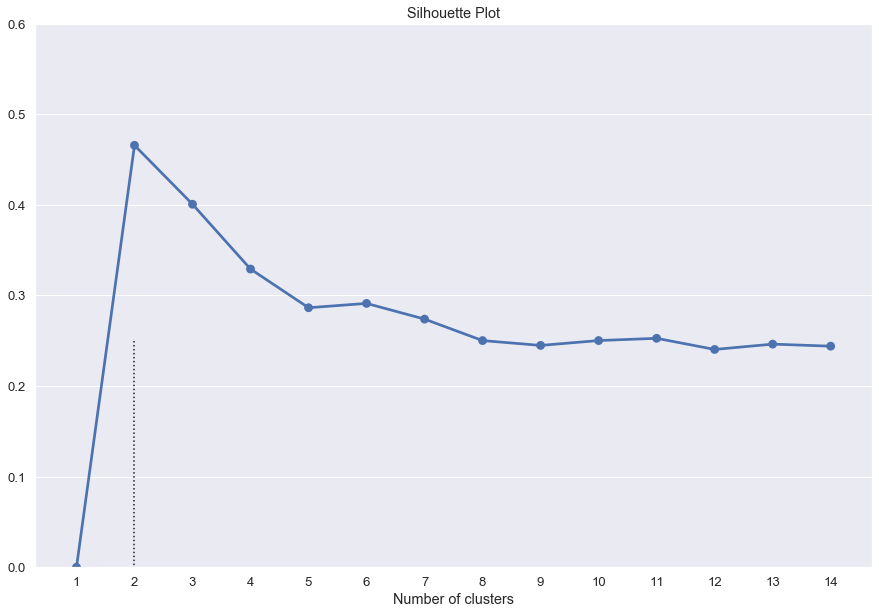

In [95]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0] 
fig,ax = plt.subplots(figsize=(15,10))
sns.pointplot(list(ss.keys()),list(ss.values())) 
plt.vlines(x=maxkey-1,ymax=0,ymin=0.25,linestyles='dotted') 
ax.set(ylim=(0, 0.60)) 
ax.set_title('Silhouette Plot') 
ax.set_xlabel('Number of clusters')

# Cluster plot visualization

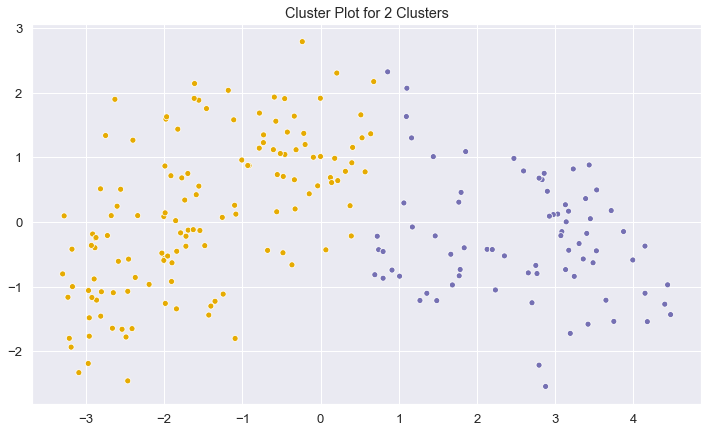

In [99]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_DF)
plt.figure(figsize=(12,7)) 
sns.scatterplot(x=plot_columns[:,0], y=plot_columns[:,1], hue=KMeans(n_clusters=2, random_state=0).fit(scaled_DF).labels_, palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 2 Clusters') 
plt.show()

In [ ]:
# Recommendations

In [39]:
DF_Kmeans = df.drop('H_clusters2', axis=1)

In [40]:
DF_Kmeans['Kmeans_clusters'] = labels

In [42]:
aggdata1=DF_Kmeans.iloc[:].groupby('Kmeans_clusters').mean()
aggdata1['Freq']=DF_Kmeans.Kmeans_clusters.value_counts().sort_index()
aggdata1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Kmeans_clusters,,,,,,,,
0,12.930602,13.693459,0.863619,5.339699,3.025917,3.822845,5.081737,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77
